In [2]:
from keras.datasets import mnist  #Dataset : Chiffres
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

## CHARGEMENT DU DATASET

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

print("Nb images entrainement = "+str(x_train.shape))
print("Nb images test = "+str(x_test.shape))


Nb images entrainement = (60000, 28, 28)
Nb images test = (10000, 28, 28)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalisation
x_train /= 255
x_test /= 255



In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
y_train[0]

5

In [ ]:
#Les images font 28x28 on va leur ajouter un padding pour obtenir une image de 32x32 (Comme indiqué par Y. Lecun)
x_train = np.pad(x_train, ((0,0), (2,2), (2,2)),'constant',constant_values=0)
x_test = np.pad(x_test, ((0,0), (2,2), (2,2)),'constant',constant_values=0)



In [ ]:
x_train.shape

(60000, 32, 32)

In [ ]:
# On transforme l'image en 4D ; (Batch size, hauteur, largeur, nb Couches RVB)
#-> Utile pour Keras
x_train = x_train.reshape(x_train.shape[0], 32,32,1)  # 1 = Niveaux de gris
x_test = x_test.reshape(x_test.shape[0], 32,32,1)

x_train[0].shape

(32, 32, 1)

In [ ]:
# One hot Encoding des labels
y_train = np_utils.to_categorical(y_train, 10)
print(y_train.shape)
y_test = np_utils.to_categorical(y_test, 10)

print(y_train)

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# CREATION DU RESEAU CONVOLUTIF

In [ ]:
from keras.models import Sequential
from keras import models, layers
import keras

In [ ]:
model = Sequential()

# COUCHE CONVOLUTION 1
model.add(layers.Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(32,32,1)))

# S2 POOLING
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# COUCHE CONVOLUTION 2
model.add(layers.Conv2D(16,kernel_size=(5,5),strides=(1,1),activation='tanh'))

# S4 POOLING
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# COUCHE CONVOLUTION 3
model.add(layers.Conv2D(120,kernel_size=(5,5),strides=(1,1),activation='tanh'))

#----------- ENTREE DANS LE RESEAU DE NEURONES ------------------

#Flatten (Couche entrée)
model.add(layers.Flatten())

#Couche cachée
model.add(layers.Dense(84,activation='sigmoid'))

#Couche de sortie
model.add(layers.Dense(10,activation='softmax'))


In [ ]:
#Compilation du modele
#loss = fonction de cout
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

# APPRENTISSAGE

In [ ]:
hist = model.fit(x=x_train,
                 y=y_train,
                 epochs=10,
                 batch_size=128,
                 validation_data=(x_test,y_test),
                 verbose=1)

#Sauvegarde du modele
model.save("lenet5.h5")

#Sauvegarde de l'historique
import pickle
with open('historique.hist', 'wb') as file_pi:
    pickle.dump(hist.history, file_pi)

Epoch 1/10
469/469 [==============================] - 37s 77ms/step - loss: 2.2225 - accuracy: 0.2950 - val_loss: 2.0420 - val_accuracy: 0.5337
Epoch 2/10
469/469 [==============================] - 36s 78ms/step - loss: 1.6672 - accuracy: 0.6159 - val_loss: 1.2957 - val_accuracy: 0.7158
Epoch 3/10
469/469 [==============================] - 35s 74ms/step - loss: 1.0778 - accuracy: 0.7584 - val_loss: 0.8906 - val_accuracy: 0.8059
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 0.7947 - accuracy: 0.8120 - val_loss: 0.6932 - val_accuracy: 0.8382
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 0.6437 - accuracy: 0.8383 - val_loss: 0.5768 - val_accuracy: 0.8585
Epoch 6/10
469/469 [==============================] - 35s 75ms/step - loss: 0.5499 - accuracy: 0.8575 - val_loss: 0.5000 - val_accuracy: 0.8729
Epoch 7/10
469/469 [==============================] - 35s 75ms/step - loss: 0.4855 - accuracy: 0.8738 - val_loss: 0.4453 - val_accuracy:

Evaluation

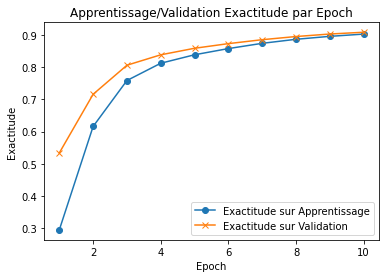

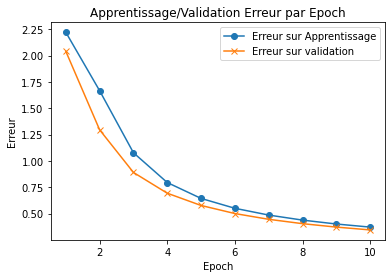

In [ ]:
with open('historique.hist', 'rb') as f:
    historique = pickle.load(f)


import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + historique["accuracy"], "o-")
ax.plot([None] + historique["val_accuracy"], "x-")

ax.legend(["Exactitude sur Apprentissage", "Exactitude sur Validation"], loc = 0)
ax.set_title('Apprentissage/Validation Exactitude par Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Exactitude')

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + historique["loss"], 'o-')
ax.plot([None] + historique['val_loss'], 'x-')

ax.legend(['Erreur sur Apprentissage', 'Erreur sur validation'], loc = 0)
ax.set_title('Apprentissage/Validation Erreur par Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Erreur')

plt.show()

# PREDICTIONS

In [ ]:
image = x_train[800]
print(image.shape)

(32, 32, 1)


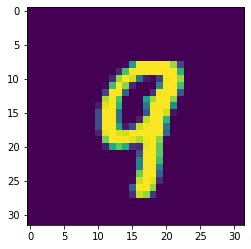

In [ ]:
display = image.reshape((32,32))
plt.imshow(display)

In [ ]:
#On ajoute le 1 devant pour "dire" que nous allons utiliser 1 image
image = image.reshape(1,32,32,1)

prediction = model.predict(image)
print(prediction)

1/1 [==============================] - 0s 17ms/step
[[0.00143427 0.00079122 0.00258    0.00312993 0.20763586 0.00552166
  0.00094025 0.01012975 0.03872113 0.7291159 ]]


In [ ]:
result = np.where(prediction == np.amax(prediction))
print ("C'est le chiffre : "+str(result[1][0]))

C'est le chiffre : 9


# A L'INTERIEUR DU CNN

In [ ]:
#Chargement d'une image et réalisation de la prédiction
layer_outputs = [layer.output for layer in model.layers[:5]]

#Liste des sorties
print(layer_outputs)


from keras import models
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(image)



[<KerasTensor: shape=(None, 28, 28, 6) dtype=float32 (created by layer 'conv2d_3')>, <KerasTensor: shape=(None, 14, 14, 6) dtype=float32 (created by layer 'average_pooling2d_2')>, <KerasTensor: shape=(None, 10, 10, 16) dtype=float32 (created by layer 'conv2d_4')>, <KerasTensor: shape=(None, 5, 5, 16) dtype=float32 (created by layer 'average_pooling2d_3')>, <KerasTensor: shape=(None, 1, 1, 120) dtype=float32 (created by layer 'conv2d_5')>]
1/1 [==============================] - 0s 64ms/step


(1, 28, 28, 6)


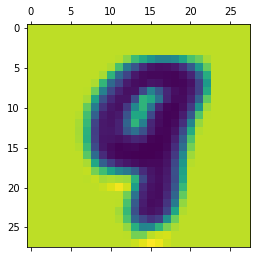

In [ ]:
#Premiere couche de convolution
first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

['conv2d_3', 'average_pooling2d_2', 'conv2d_4', 'average_pooling2d_3', 'conv2d_5']
conv2d_3


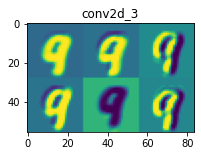

average_pooling2d_2


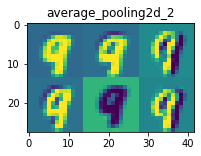

conv2d_4


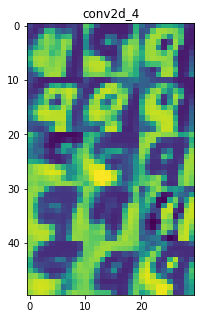

average_pooling2d_3


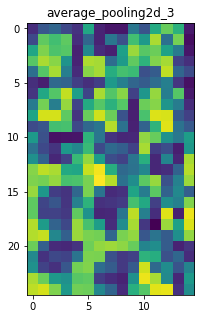

conv2d_5


<ipython-input-47-0297690a7adc>:21: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


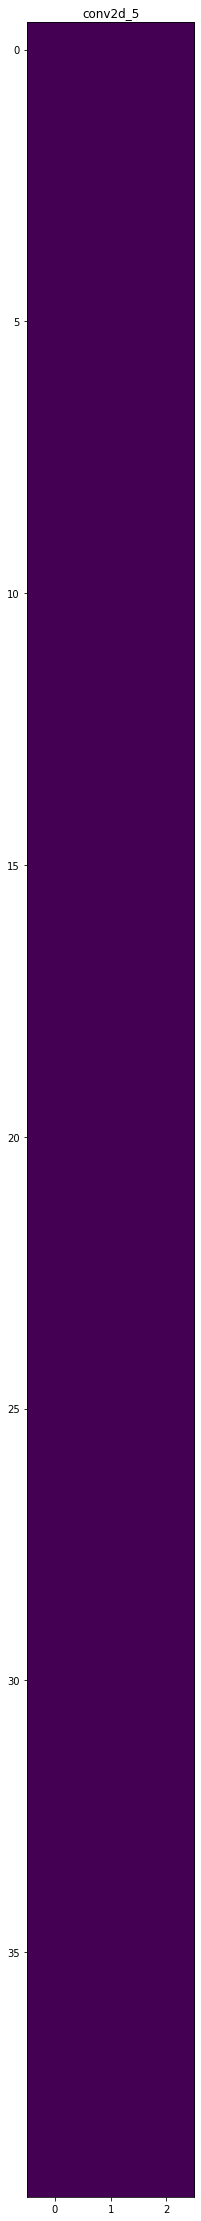

In [ ]:
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name)  # Names of the layers, so you can have them as part of your plot

print(layer_names)

images_per_row = 3

for layer_name, layer_activation in zip(layer_names, activations):  # Displays the feature maps
    print(layer_name)
    n_features = layer_activation.shape[-1]  # Number of features in the feature map
    size = layer_activation.shape[1]  # The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row  # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):  # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                            :, :,
                            col * images_per_row + row]
            channel_image -= channel_image.mean()  # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size: (col + 1) * size,  # Displays the grid
            row * size: (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

# AVEC UNE VRAIE IMAGE

In [ ]:
!wget https://qstom-it.com/echanges/datasets/ecoles/efficom/nombre_manuscrit.jpg

--2022-12-08 10:23:58--  https://qstom-it.com/echanges/datasets/ecoles/efficom/nombre_manuscrit.jpg
Resolving qstom-it.com (qstom-it.com)... 146.88.237.34
Connecting to qstom-it.com (qstom-it.com)|146.88.237.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22673 (22K) [image/jpeg]
Saving to: ‘nombre_manuscrit.jpg’

nombre_manuscrit.jp 100%[===================>]  22.14K  --.-KB/s    in 0.1s    

2022-12-08 10:23:59 (223 KB/s) - ‘nombre_manuscrit.jpg’ saved [22673/22673]



In [ ]:
!wget https://qstom-it.com/echanges/datasets/ecoles/efficom/lenet5_32.h5

--2022-12-08 10:24:11--  https://qstom-it.com/echanges/datasets/ecoles/efficom/lenet5_32.h5
Resolving qstom-it.com (qstom-it.com)... 146.88.237.34
Connecting to qstom-it.com (qstom-it.com)|146.88.237.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4395824 (4.2M)
Saving to: ‘lenet5_32.h5’

lenet5_32.h5        100%[===================>]   4.19M  4.89MB/s    in 0.9s    

2022-12-08 10:24:12 (4.89 MB/s) - ‘lenet5_32.h5’ saved [4395824/4395824]



In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 
img = cv2.imread('nombre_manuscrit.jpg')
print(img.shape)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img.shape)

(328, 897, 3)
(328, 897)


In [ ]:
import numpy as np
#Transformation en image binaire
ret,image_binarisee = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#Normalisation des pixels de l'image (entre 0 et 1)
#Si blanc = 1
image_binarisee = image_binarisee.astype('float32')
image_binarisee /= 255

image_binarisee = np.array(image_binarisee)

image_binarisee

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

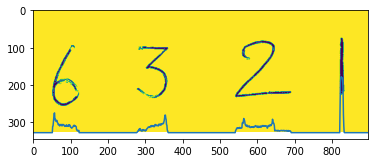

In [ ]:
import matplotlib.pyplot as plt
#---------------------------
# HISTOGRAMME VERTICAL
#---------------------------

#Calcul de la somme des pixels par colonnes
histV = []
for x in range(image_binarisee.shape[1]):
    val = np.sum(image_binarisee[:,x])
    histV.append(val)

#Affichage de l'histogramme
fig, ax = plt.subplots()
ax.imshow(image_binarisee)
ax.plot(histV)

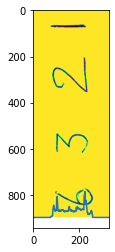

In [ ]:
#----------------------------
# HISTOGRAMME HORIZONTAL
#----------------------------

#Calcul de la somme des pixels par colonnes
histH = []
for y in range(image_binarisee.shape[0]):
    val = np.sum(image_binarisee[y,:])
    histH.append(val)

#Affichage de l'histogramme
fig, ax = plt.subplots()
ax.imshow(cv2.rotate(image_binarisee, cv2.ROTATE_90_COUNTERCLOCKWISE))
ax.plot(histH)
#plt.show()

In [ ]:
#----------------------------
# RECHERCHE DES ZONES
#----------------------------

def recherchesDemarcation(histogramme, sommeCouleurAttendue):

    dansZone = False
    posDebutZone = 0
    posFinZone = 0
    zones = []

    indexPixel = 0;
    for valeur in histogramme:

        #Somme des couleurs des pixels est différent de la somme des couleurs attendues
        if (valeur!= sommeCouleurAttendue):

            #Si je ne me trouve pas encore dans une zone :
            if (dansZone == False):
                posDebutZone = indexPixel
                dansZone = True

        #La sommes des couleurs des pixels est identiques à celle attendue
        else :

            #Si on se trouve dans une zone, alors on la clos en indiquant comme position finale, la
            #position du pixel précédent
            if (dansZone==True):
                posFinZone = indexPixel-1
                zones.append([posDebutZone,posFinZone])
                dansZone = False

        indexPixel += 1

    return zones

In [ ]:
#Extraction des coordonnées des zones
print(histH)
print(image_binarisee.shape)
zonesH = recherchesDemarcation(histH,image_binarisee.shape[1])
print(zonesH)

zonesV = recherchesDemarcation(histV,image_binarisee.shape[0])
print(zonesV)

[897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 897.0, 893.0, 892.0, 892.0, 892.0, 891.0, 891.0, 891.0, 888.0, 873.0, 860.0, 853.0, 849.0, 844.0, 853.0, 858.0, 863.0, 865.0, 864.0, 870.0, 869.0, 868.0, 863.0, 868.0, 858.0, 854.0, 812.0, 810.0, 806.0, 825.0, 836.0, 865.0, 868.0, 866.0, 867.0, 866.0, 868.0, 864.0, 871.0, 869.0, 869.0, 868.0, 869.0, 866.0, 868.0, 867.0, 865.0, 868.0, 863.0, 865.0, 866.0, 865.0, 864.0, 864.0, 864.0, 868.0, 869.0, 867.0, 871.0, 871.0, 872.0, 870.0, 872.0, 871.0, 870.0, 871.0, 871.0

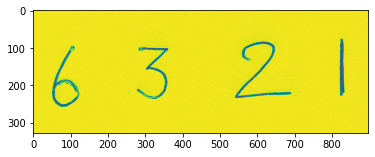

In [ ]:
#----------------------------
# EXTRACTION DES IMAGES
#----------------------------

#Extraction des zones - V1
idZone = 0
for positionChiffres in zonesV :

    #Calcul des coordonnées de la zone a extraire
    yHautGauche = zonesH[0][0]
    xHautGauche = positionChiffres[0]
    yBasDroite = zonesH[0][1]
    xBasDroite = positionChiffres[1]


    #Si on laisse ce code, cela laisse le cadre et donc empeche la détection
    #UTILE POUR VOIR CE QUI SE PASSE MAIS A DECOMMENTER
    #image = cv2.rectangle(img, (xHautGauche,yHautGauche), (xBasDroite,yBasDroite), (0, 255, 0), 2)

    #On supprime les contours
    image = img

    plt.imshow(image)
    
    idZone += 1

In [ ]:
#-----------------------------------------
# EXTRACTION DES IMAGES ET PREDICTION
#------------------------------------------

#Chargement du modèle
from keras.models import load_model
model = load_model('lenet5_32.h5')

#Nombre manuscrit
ChiffreEcrit = ""


idZone = 0
for positionChiffres in zonesV :

    #Calcul des coordonnées de la zone a extraire
    yHautGauche = zonesH[0][0]-5
    xHautGauche = positionChiffres[0]-20
    yBasDroite = zonesH[0][1]+20
    xBasDroite = positionChiffres[1]+20

    #Calcul de l'aire
    aire = (xBasDroite - xHautGauche) * (yBasDroite - yHautGauche)
    print(aire)

    #On exclu les aires des zones inférieures à 10000
    if (aire>10000):
        #image = cv2.rectangle(image_binarisee, (xHautGauche,yHautGauche), (xBasDroite,yBasDroite), (0, 255, 0), 2)

        # Displaying the image
        #plt.imshow(image)

        #Extraction de l'image
        #TOUT SE JOUE LA !! IL FAUT QUE LE CHIFFRE SOIT CORRECTEMENT CENTRE SUR L'IMAGE 32x32
        #IL FAUT DONC JOUER AVEC LES MARGES DE DETECTION
        chiffre = img[yHautGauche-10:yBasDroite+30, xHautGauche-30:xBasDroite+30]

        # Recherche contours
        canny = cv2.Canny(chiffre, 30, 200)
        contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

        # On selectionne le plus grand contours
        cnt = sorted(contours, key=cv2.contourArea, reverse=True)[0]

        # On créé une boite
        captureChiffre = np.zeros((chiffre.shape[0], chiffre.shape[1]), dtype=np.uint8)

        # On dessine le contour
        chiffre = cv2.drawContours(captureChiffre, contours, -1, (255, 255, 255), 10)

        # On redimentionne le chiffre en 32x32
        chiffre_redimentionne = cv2.resize(chiffre, (32,32), interpolation=cv2.INTER_AREA)

        #On sauvegarde le chiffre
        cv2.imwrite('Tests/IMG-32x32_' + str(idZone) + ".jpg", chiffre_redimentionne)

        #On realise la prediction
        chiffre_redimentionne = chiffre_redimentionne.astype('float32')
        chiffre_redimentionne /= 255
        chiffre_redimentionne = chiffre_redimentionne.reshape(1, 32, 32, 1)

        prediction = model.predict(chiffre_redimentionne)
        print(prediction)
        print(np.max(prediction))
        result = np.where(prediction == np.max(prediction))
        ChiffreEcrit = ChiffreEcrit + (str(result[1][0]))

        cv2.waitKey(0)
        cv2.destroyAllWindows()


    idZone += 1


print("\n >>> Le chiffre lu est : "+ChiffreEcrit)

22550
1/1 [==============================] - 0s 201ms/step
[[3.2031447e-05 3.2068735e-07 2.9429104e-05 1.4678810e-08 6.3889247e-06
  4.6512787e-03 9.9368817e-01 7.7489543e-12 1.5922816e-03 2.0506594e-07]]
0.99368817
25215
1/1 [==============================] - 0s 112ms/step
[[1.9650359e-03 6.1326049e-04 1.8142734e-03 7.3963678e-01 1.5442565e-05
  2.5465140e-01 7.2189939e-04 2.9390681e-04 4.4317762e-06 2.8366316e-04]]
0.7396368
38540
1/1 [==============================] - 0s 54ms/step
[[2.19182298e-02 2.72513111e-03 5.18595457e-01 1.80097237e-01
  1.09528769e-02 6.86728731e-02 1.96761459e-01 1.95524350e-04
  6.64109466e-05 1.48217205e-05]]
0.51859546
10455
1/1 [==============================] - 0s 58ms/step
[[4.5981055e-06 9.3274564e-01 1.8856466e-04 1.1574909e-04 5.3424846e-02
  4.4024455e-05 1.1204599e-03 1.4077706e-03 6.2287168e-04 1.0325429e-02]]
0.93274564

 >>> Le chiffre lu est : 6321
